In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [2]:
#Cargar datos
df = pd.read_csv('./datos/dataset_limpio.csv', parse_dates=['fecha'])

ANÁLISIS DE CARTAS DE CONTROL X-mR
=== Parámetros X–mR para 'abv' ===
X̄      = 6.938
mR̄     = 0.123
UCL X   = 7.264
LCL X   = 6.611
UCL mR  = 0.401
LCL mR  = 0.000



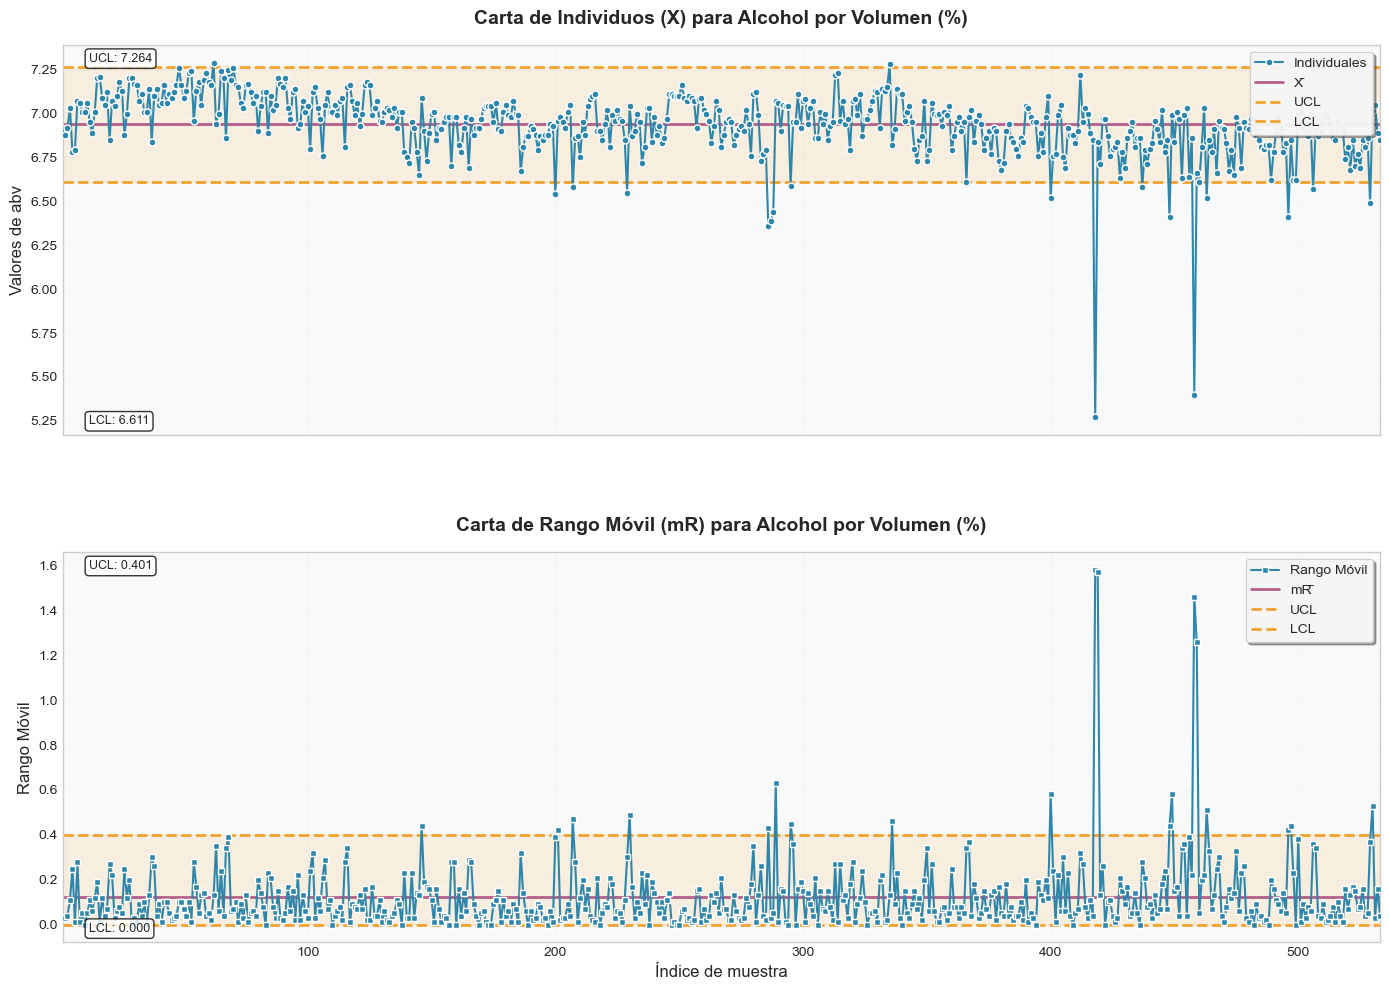


=== Verificación de cálculos para abv ===
Número de observaciones: 533
Número de rangos móviles: 532
Primer valor abv: 6.910
Último valor abv: 6.850
Primer rango móvil: 0.030
Último rango móvil: 0.040
--------------------------------------------------
=== Parámetros X–mR para 'gfa' ===
X̄      = 82.445
mR̄     = 0.348
UCL X   = 83.371
LCL X   = 81.520
UCL mR  = 1.137
LCL mR  = 0.000



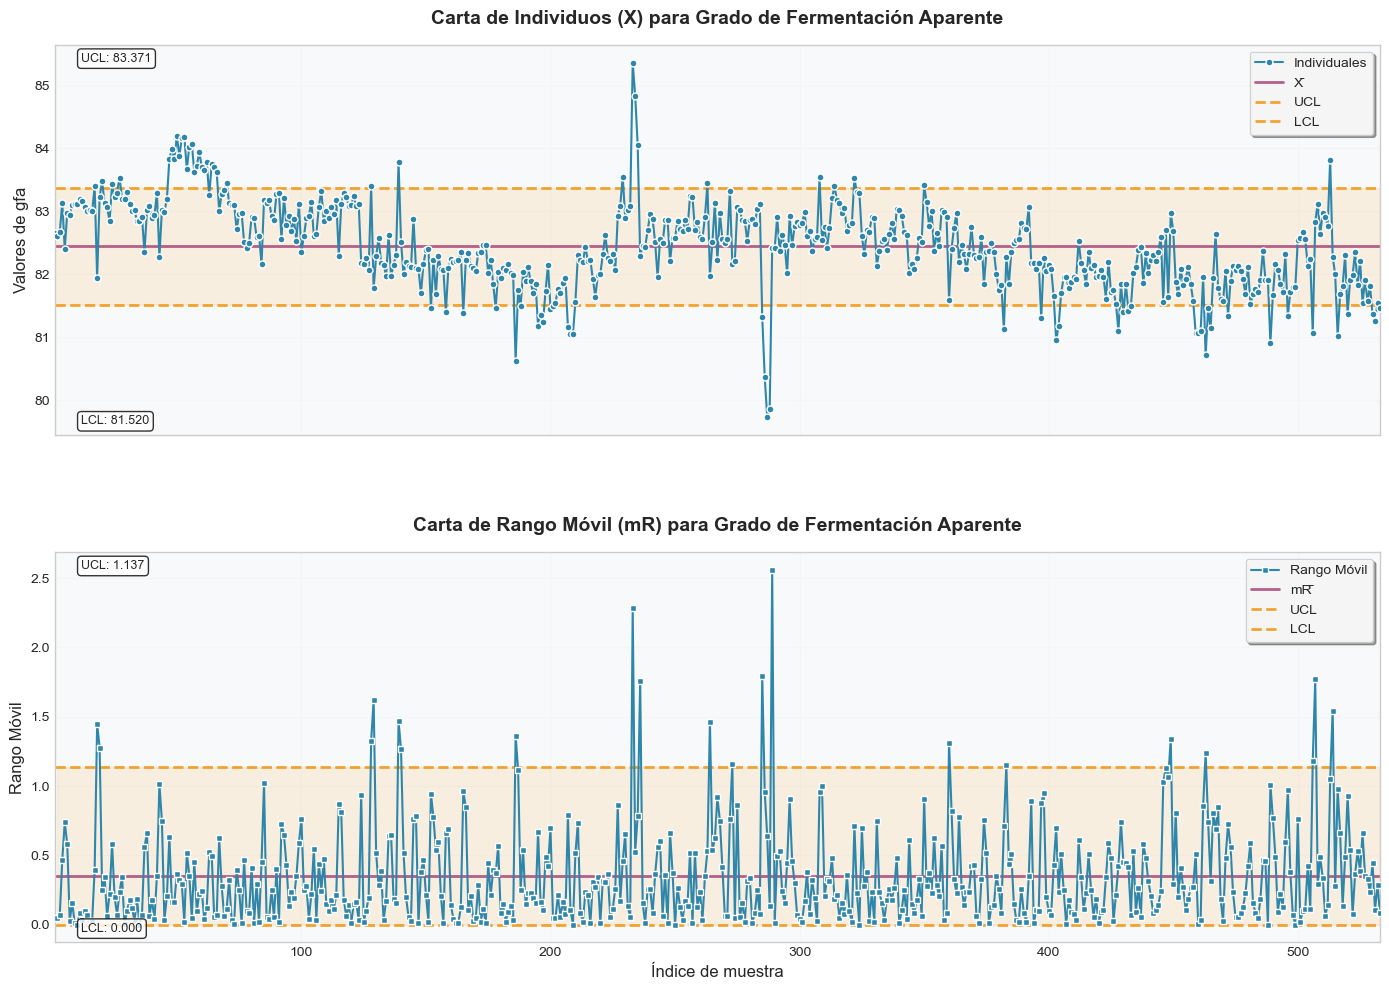


=== Verificación de cálculos para gfa ===
Número de observaciones: 533
Número de rangos móviles: 532
Primer valor gfa: 82.651
Último valor gfa: 81.460
Primer rango móvil: 0.045
Último rango móvil: 0.083
--------------------------------------------------
=== Parámetros X–mR para 'gfr' ===
X̄      = 66.663
mR̄     = 0.295
UCL X   = 67.448
LCL X   = 65.878
UCL mR  = 0.964
LCL mR  = 0.000



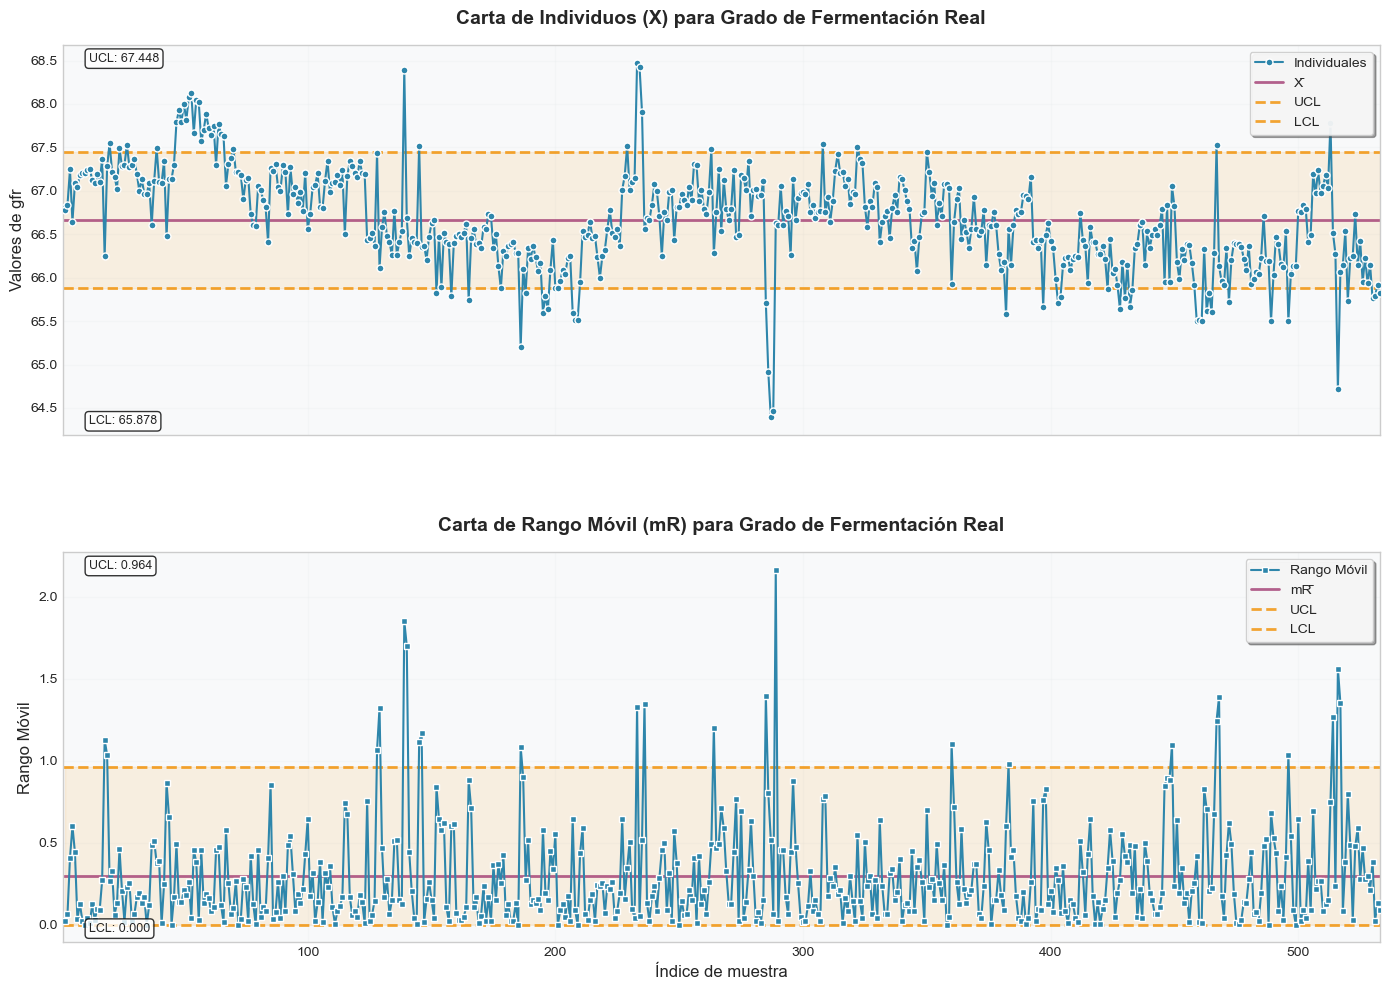


=== Verificación de cálculos para gfr ===
Número de observaciones: 533
Número de rangos móviles: 532
Primer valor gfr: 66.797
Último valor gfr: 65.827
Primer rango móvil: 0.021
Último rango móvil: 0.090
--------------------------------------------------

Análisis completado para todas las variables.


In [3]:
# Gráficas de control X-mR

# estilo
plt.style.use('seaborn-v0_8-whitegrid')
colors = {
    'data': '#2E86AB',
    'center': '#A23B72',
    'limits': '#F18F01',
    'background': '#F8F9FA',
    'grid': '#E9ECEF'
}

# variables de salida a analizar
variables_to_analyze = ['abv', 'gfa', 'gfr']

# Nombres descriptivos para las variables
variable_names = {
    'abv': 'Alcohol por Volumen (%)',
    'gfa': 'Grado de Fermentación Aparente',
    'gfr': 'Grado de Fermentación Real'
}

# Funciones Auxiliares
def calculate_xmr_stats(data):
    #Calcular estadísticos X-mR para una serie de datos
    # Eliminar valores NaN
    clean_data = data.dropna()
    
    # Promedio de individuales
    xbar = np.mean(clean_data)
    
    # Rango móvil (mR) - diferencia absoluta entre valores consecutivos
    mr = np.abs(np.diff(clean_data))
    mr_bar = np.mean(mr)
    
    # Constantes para carta X–mR
    d2 = 1.128  # valor estándar para mR de tamaño 2
    ucla_x = xbar + 2.66 * mr_bar
    lcla_x = xbar - 2.66 * mr_bar
    ucla_mr = 3.267 * mr_bar
    lcla_mr = 0
    
    return {
        'data': clean_data,
        'mr': mr,
        'xbar': xbar,
        'mr_bar': mr_bar,
        'ucla_x': ucla_x,
        'lcla_x': lcla_x,
        'ucla_mr': ucla_mr,
        'lcla_mr': lcla_mr
    }

def print_xmr_summary(var_name, stats):
    # Imprimir resumen estadístico en formato idéntico a R
    print(f"=== Parámetros X–mR para '{var_name}' ===")
    print(f"X̄      = {stats['xbar']:.3f}")
    print(f"mR̄     = {stats['mr_bar']:.3f}")
    print(f"UCL X   = {stats['ucla_x']:.3f}")
    print(f"LCL X   = {stats['lcla_x']:.3f}")
    print(f"UCL mR  = {stats['ucla_mr']:.3f}")
    print(f"LCL mR  = {stats['lcla_mr']:.3f}\n")

def create_xmr_chart(stats, var_name, var_display_name=None):
    
    # Crear carta X-mR combinada idéntica al estilo de R/qcc
    if var_display_name is None:
        var_display_name = var_name
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    fig.patch.set_facecolor('white')
    
    x_data = stats['data']
    mr_data = stats['mr']
    xbar = stats['xbar']
    mr_bar = stats['mr_bar']
    ucl_x = stats['ucla_x']
    lcl_x = stats['lcla_x']
    ucl_mr = stats['ucla_mr']
    lcl_mr = stats['lcla_mr']
    
    # GRÁFICO X (Individuales) - Superior
    ax1.set_facecolor(colors['background'])
    
    # Datos individuales
    indices_x = range(1, len(x_data) + 1)
    ax1.plot(indices_x, x_data, 
             marker='o', markersize=5, linewidth=1.5,
             color=colors['data'], markerfacecolor=colors['data'],
             markeredgecolor='white', markeredgewidth=1,
             label='Individuales', zorder=3)
    
    # Líneas de control
    ax1.axhline(xbar, color=colors['center'], linestyle='-', 
                linewidth=2, label='X̄', alpha=0.8, zorder=2)
    ax1.axhline(ucl_x, color=colors['limits'], linestyle='--', 
                linewidth=2, label='UCL', alpha=0.8, zorder=2)
    ax1.axhline(lcl_x, color=colors['limits'], linestyle='--', 
                linewidth=2, label='LCL', alpha=0.8, zorder=2)
    
    # Zona de control
    ax1.fill_between(indices_x, lcl_x, ucl_x, alpha=0.1, color=colors['limits'])
    
    # Personalización
    ax1.set_ylabel(f'Valores de {var_name}', fontsize=12, fontweight='medium')
    ax1.set_title(f'Carta de Individuos (X) para {var_display_name}', fontsize=14, fontweight='bold', pad=15)
    ax1.grid(True, linestyle='-', alpha=0.3, color=colors['grid'])
    ax1.set_axisbelow(True)
    
    # Leyenda
    legend1 = ax1.legend(loc='upper right', frameon=True, fancybox=True, 
                        shadow=True, framealpha=0.9, fontsize=10)
    legend1.get_frame().set_facecolor('white')
    
    # Valores de límites
    ax1.text(0.02, 0.98, f'UCL: {ucl_x:.3f}', transform=ax1.transAxes, 
             verticalalignment='top', fontsize=9, 
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    ax1.text(0.02, 0.02, f'LCL: {lcl_x:.3f}', transform=ax1.transAxes, 
             verticalalignment='bottom', fontsize=9,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    # GRÁFICO mR (Rango Móvil) - Inferior
    ax2.set_facecolor(colors['background'])
    
    # Datos de rango móvil (empiezan desde índice 2)
    indices_mr = range(2, len(x_data) + 1)
    ax2.plot(indices_mr, mr_data, 
             marker='s', markersize=5, linewidth=1.5,
             color=colors['data'], markerfacecolor=colors['data'],
             markeredgecolor='white', markeredgewidth=1,
             label='Rango Móvil', zorder=3)
    
    # Líneas de control
    ax2.axhline(mr_bar, color=colors['center'], linestyle='-', 
                linewidth=2, label='mR̄', alpha=0.8, zorder=2)
    ax2.axhline(ucl_mr, color=colors['limits'], linestyle='--', 
                linewidth=2, label='UCL', alpha=0.8, zorder=2)
    ax2.axhline(lcl_mr, color=colors['limits'], linestyle='--', 
                linewidth=2, label='LCL', alpha=0.8, zorder=2)
    
    # Zona de control
    ax2.fill_between(indices_mr, lcl_mr, ucl_mr, alpha=0.1, color=colors['limits'])
    
    # Personalización
    ax2.set_ylabel('Rango Móvil', fontsize=12, fontweight='medium')
    ax2.set_xlabel('Índice de muestra', fontsize=12, fontweight='medium')
    ax2.set_title(f'Carta de Rango Móvil (mR) para {var_display_name}', fontsize=14, fontweight='bold', pad=15)
    ax2.grid(True, linestyle='-', alpha=0.3, color=colors['grid'])
    ax2.set_axisbelow(True)
    
    # Leyenda
    legend2 = ax2.legend(loc='upper right', frameon=True, fancybox=True, 
                        shadow=True, framealpha=0.9, fontsize=10)
    legend2.get_frame().set_facecolor('white')
    
    # Valores de límites
    ax2.text(0.02, 0.98, f'UCL: {ucl_mr:.3f}', transform=ax2.transAxes, 
             verticalalignment='top', fontsize=9, 
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    ax2.text(0.02, 0.02, f'LCL: {lcl_mr:.3f}', transform=ax2.transAxes, 
             verticalalignment='bottom', fontsize=9,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    ax2.set_xlim(1, len(x_data))
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.3)
    
    return fig, (ax1, ax2)

def print_verification_summary(var_name, stats):
    # Imprimir verificación de cálculos
    x_data = stats['data']
    mr_data = stats['mr']
    
    print(f"\n=== Verificación de cálculos para {var_name} ===")
    print(f"Número de observaciones: {len(x_data)}")
    print(f"Número de rangos móviles: {len(mr_data)}")
    print(f"Primer valor {var_name}: {x_data.iloc[0]:.3f}")
    print(f"Último valor {var_name}: {x_data.iloc[-1]:.3f}")
    print(f"Primer rango móvil: {mr_data[0]:.3f}")
    print(f"Último rango móvil: {mr_data[-1]:.3f}")
    print("-" * 50)

# PROCESAMIENTO PRINCIPAL

print("ANÁLISIS DE CARTAS DE CONTROL X-mR")
print("=" * 60)

# Procesando cada variable
for var in variables_to_analyze:
    try:
        if var not in df.columns:
            print(f"Variable '{var}' no encontrada en el dataset. Saltando...")
            continue
        
        # Obtener nombre descriptivo
        var_display_name = variable_names.get(var, var.upper())
        
        # Calcular estadísticos X-mR
        stats = calculate_xmr_stats(df[var])
        
        # Verificar que hay suficientes datos
        if len(stats['data']) < 2:
            print(f"Variable '{var}' no tiene suficientes datos válidos. Saltando...")
            continue
        
        # Imprimir resumen estadístico
        print_xmr_summary(var, stats)
        
        # Crear y mostrar gráfico
        fig, (ax1, ax2) = create_xmr_chart(stats, var, var_display_name)
        plt.show()
        
        # Imprimir verificación
        print_verification_summary(var, stats)
        
    except Exception as e:
        print(f"Error procesando variable '{var}': {str(e)}")
        continue

print("\nAnálisis completado para todas las variables.")

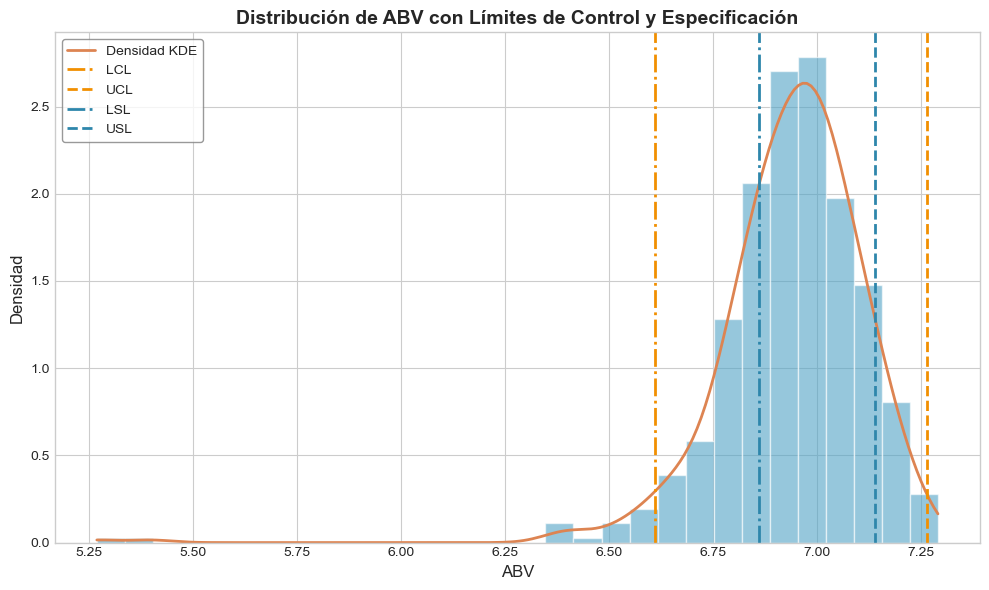

In [4]:
# Gráfico de distribución de ABV

# Parámetros resultantes según especificación Yucay Brewewry
UCL = 7.264  # Upper Control Limit
LCL = 6.611  # Lower Control Limit
USL = 7.14  # Upper Specification Limit
LSL = 6.86  # Lower Specification Limit

# Prepara datos y estilo
data = df['abv'].dropna().values
plt.style.use('seaborn-v0_8-whitegrid')

# Calcula KDE para suavizar la distribución
kde = gaussian_kde(data)
x_vals = np.linspace(data.min(), data.max(), 200)
kde_vals = kde(x_vals)

# Crea figura
fig, ax = plt.subplots(figsize=(10, 6))

# Histograma normalizado
ax.hist(
    data,
    bins=30,
    density=True,
    alpha=0.6,
    color="#50A3C6",
    edgecolor='white',
    linewidth=1
)

# Curva de densidad
ax.plot(
    x_vals,
    kde_vals,
    color='#DD8452',
    linewidth=2,
    label='Densidad KDE'
)

# Líneas verticales de límites
limits = {
    'LCL': (LCL, '#F18F01', '-.'),
    'UCL': (UCL, '#F18F01', '--'),
    'LSL': (LSL, '#2E86AB', '-.'),
    'USL': (USL, '#2E86AB', '--')
}

# colors = {
#     'data': '#2E86AB',
#     'center': '#A23B72',
#     'limits': '#F18F01',
#     'background': '#F8F9FA',
#     'grid': '#E9ECEF'
# }

for name, (x, color, ls) in limits.items():
    ax.axvline(
        x=x,
        color=color,
        linestyle=ls,
        linewidth=2,
        label=name
    )

# Etiquetas y leyenda
ax.set_title('Distribución de ABV con Límites de Control y Especificación', fontsize=14, weight='bold')
ax.set_xlabel('ABV', fontsize=12)
ax.set_ylabel('Densidad', fontsize=12)
ax.legend(frameon=True, edgecolor='gray')

# Ajustes finales
plt.tight_layout()
plt.show()


In [5]:
from scipy import stats

In [6]:
# Identificación de outliers

# Método IQR (Rango intercuartílico)
def detect_outliers_iqr(data, cols):
    outliers = {}
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask = (data[col] < lower) | (data[col] > upper)
        outliers[col] = data.loc[mask, col]
        print(f"{col}: {mask.sum()} outliers detectados (IQR)")
    return outliers

numeric_cols = df.select_dtypes(include='number').columns.tolist()
outliers_iqr = detect_outliers_iqr(df, numeric_cols)

# Método Z-score
def detect_outliers_zscore(data, cols, threshold=3):
    z_scores = stats.zscore(data[cols].fillna(0))
    abs_z = abs(z_scores)
    outlier_mask = (abs_z > threshold)
    outliers = {}
    for i, col in enumerate(cols):
        mask = outlier_mask[:, i]
        outliers[col] = data.loc[mask, col]
        print(f"{col}: {mask.sum()} outliers detectados (Z-score > {threshold})")
    return outliers

outliers_z = detect_outliers_zscore(df, numeric_cols, threshold=3)


ea: 4 outliers detectados (IQR)
er: 6 outliers detectados (IQR)
eo: 11 outliers detectados (IQR)
gfa: 6 outliers detectados (IQR)
gfr: 7 outliers detectados (IQR)
abv: 11 outliers detectados (IQR)
pH: 8 outliers detectados (IQR)
reposo2_min: 44 outliers detectados (IQR)
reposo2_temp: 54 outliers detectados (IQR)
reposo3_min: 0 outliers detectados (IQR)
reposo3_temp: 49 outliers detectados (IQR)
reposo4_min: 4 outliers detectados (IQR)
reposo4_temp: 40 outliers detectados (IQR)
pH_1: 58 outliers detectados (IQR)
primer_mosto_extracto: 0 outliers detectados (IQR)
ultima_agua_extracto: 44 outliers detectados (IQR)
agua_lavado_temp: 18 outliers detectados (IQR)
temperatura_llenado: 24 outliers detectados (IQR)
paila_llena_extracto: 0 outliers detectados (IQR)
ebullicion_minutos: 0 outliers detectados (IQR)
ebullicion_temp: 0 outliers detectados (IQR)
mosto_frio_extracto: 33 outliers detectados (IQR)
ea: 4 outliers detectados (Z-score > 3)
er: 6 outliers detectados (Z-score > 3)
eo: 7 outli

In [7]:
#eliminacion de outliers, según IQR, en variables de salida ABV, gfa y gfr

numeric_cols = ['abv', 'gfa', 'gfr']

# --- Eliminación usando IQR ---
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

mask_iqr = ~((df[numeric_cols] < lower) | (df[numeric_cols] > upper)).any(axis=1)
df_iqr_clean = df.loc[mask_iqr].reset_index(drop=True)

print(f"IQR: {len(df)} → {len(df_iqr_clean)} registros después de eliminar outliers")




IQR: 533 → 517 registros después de eliminar outliers


In [8]:
#Comprobación de cuántos outliers quedaron

# Método IQR (Rango intercuartílico)
def detect_outliers_iqr(data, cols):
    outliers = {}
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask = (data[col] < lower) | (data[col] > upper)
        outliers[col] = data.loc[mask, col]
        print(f"{col}: {mask.sum()} outliers detectados (IQR)")
    return outliers

numeric_cols = df_iqr_clean.select_dtypes(include='number').columns.tolist()
outliers_iqr = detect_outliers_iqr(df_iqr_clean, numeric_cols)

# Método Z-score
def detect_outliers_zscore(data, cols, threshold=3):
    z_scores = stats.zscore(data[cols].fillna(0))
    abs_z = abs(z_scores)
    outlier_mask = (abs_z > threshold)
    outliers = {}
    for i, col in enumerate(cols):
        mask = outlier_mask[:, i]
        outliers[col] = data.loc[mask, col]
        print(f"{col}: {mask.sum()} outliers detectados (Z-score > {threshold})")
    return outliers

outliers_z = detect_outliers_zscore(df_iqr_clean, numeric_cols, threshold=3)

ea: 2 outliers detectados (IQR)
er: 11 outliers detectados (IQR)
eo: 5 outliers detectados (IQR)
gfa: 0 outliers detectados (IQR)
gfr: 0 outliers detectados (IQR)
abv: 2 outliers detectados (IQR)
pH: 7 outliers detectados (IQR)
reposo2_min: 40 outliers detectados (IQR)
reposo2_temp: 49 outliers detectados (IQR)
reposo3_min: 0 outliers detectados (IQR)
reposo3_temp: 47 outliers detectados (IQR)
reposo4_min: 3 outliers detectados (IQR)
reposo4_temp: 40 outliers detectados (IQR)
pH_1: 56 outliers detectados (IQR)
primer_mosto_extracto: 0 outliers detectados (IQR)
ultima_agua_extracto: 42 outliers detectados (IQR)
agua_lavado_temp: 16 outliers detectados (IQR)
temperatura_llenado: 23 outliers detectados (IQR)
paila_llena_extracto: 0 outliers detectados (IQR)
ebullicion_minutos: 0 outliers detectados (IQR)
ebullicion_temp: 0 outliers detectados (IQR)
mosto_frio_extracto: 31 outliers detectados (IQR)
ea: 2 outliers detectados (Z-score > 3)
er: 4 outliers detectados (Z-score > 3)
eo: 3 outlie

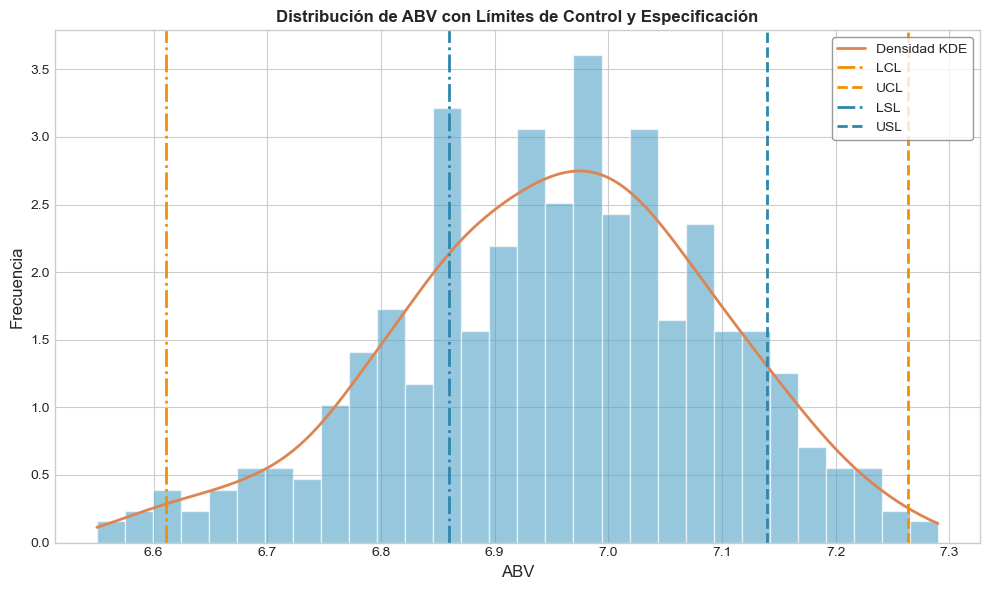

In [9]:
#DISTRIBUCIÓN Y PARMETROS DE CONTROL DE ABV SIN OUTLIERS
# ——————————————————————————————
# Parámetros
UCL = 7.264  # Upper Control Limit
LCL = 6.611  # Lower Control Limit
USL = 7.14  # Upper Specification Limit
LSL = 6.86  # Lower Specification Limit
# ——————————————————————————————

# Prepara datos y estilo
data = df_iqr_clean['abv'].dropna().values
plt.style.use('seaborn-v0_8-whitegrid')

# Calcula KDE para suavizar la distribución
kde = gaussian_kde(data)
x_vals = np.linspace(data.min(), data.max(), 200)
kde_vals = kde(x_vals)

# Crea figura
fig, ax = plt.subplots(figsize=(10, 6))

# Histograma normalizado
ax.hist(
    data,
    bins=30,
    density=True,
    alpha=0.6,
    color="#50A3C6",
    edgecolor='white',
    linewidth=1
)

# Curva de densidad
ax.plot(
    x_vals,
    kde_vals,
    color='#DD8452',
    linewidth=2,
    label='Densidad KDE'
)

# Líneas verticales de límites
limits = {
    'LCL': (LCL, '#F18F01', '-.'),
    'UCL': (UCL, '#F18F01', '--'),
    'LSL': (LSL, '#2E86AB', '-.'),
    'USL': (USL, '#2E86AB', '--')
}

# colors = {
#     'data': '#2E86AB',
#     'center': '#A23B72',
#     'limits': '#F18F01',
#     'background': '#F8F9FA',
#     'grid': '#E9ECEF'
# }

for name, (x, color, ls) in limits.items():
    ax.axvline(
        x=x,
        color=color,
        linestyle=ls,
        linewidth=2,
        label=name
    )

# Etiquetas y leyenda
ax.set_title('Distribución de ABV con Límites de Control y Especificación', fontsize=12, weight='bold')
ax.set_xlabel('ABV', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)
ax.legend(frameon=True, edgecolor='gray')

# Ajustes finales
plt.tight_layout()
plt.show()

In [10]:
# Sobrescribir df con el DataFrame limpio por IQR
#df = df_iqr_clean.copy()
df_iqr_clean.to_csv('./datos/dataset_limpio_s_outliers.csv', index=False)